# Benign or malignant tumors (KNN)

Import the libraries we are gonna use

In [1]:
import operator
import pandas as pd
from matplotlib import pyplot as plt

### We start creating the functions for KNN with the Eculidian Distance

The input are only 2 elements, the test and the trained element, where both are a list, then for each element of the lists we perform their substraction to the power of 2 and add it to another variable which will have the sum of all the substractions and then we return the square root of that variable. I.E.

$$\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + ... + (z_1 - z_2)^2 }$$

In [2]:
def Euclidian (TrainedList, TestPoint):
    distance=0
    for i in range (len(TestPoint)):
        distance += (TrainedList[i]-TestPoint[i])**2
    return (distance)**0.5

### Obtain the K Nearest Neighbors
- For each element in the training set we get their distance with the test element with the previous function
- Create a list that have the class of the elements with their distances
- Sort the list of the distances
- Return the k first elements of the list, we only return the elements, not their distance

In [3]:
def Kneighbors (TrainedList, TestPoint, k):
    distance=[]
    for x in TrainedList:
        distance.append([Euclidian(x, TestPoint), x[-1]])
    distance.sort()

    neighbors=[]
    for i in range(k):
        neighbors.append(distance[i][1])
    return neighbors

### Create The Principal Function
- Traverse each element of the test list to get their individual class; for this we`re going to:
- Get their k nearest neighbors.
- Check the class of each neighbor.
- Create a dictionary to find out which is the most repeated class in the k nearest neighbors, so we traverse the list of the K nearest neighbors and every time we pass a class, we add one to its frequence.
- Sort the dictionary and the first element is the most repeated class.
- Assign that class to the element we are.


In [4]:
def KNN (Trained, Test, k):
    clasification=[]
    for x in Test:
        neighbors=Kneighbors(Trained, x, k)
        Class={}
        for n in neighbors:
            if n in Class :
                Class[n]+=1
            else:
                Class[n]=1
        dictSort=sorted(Class.items(), key=operator.itemgetter(1), reverse=True)
        x.append(dictSort[0][0])
        clasification.append(dictSort[0][0])


### Read the csv file
Separate the tumors according to their classification, benign or malign to work with a better organization

In [5]:
data=pd.read_csv('DataSets/tumors.csv')
benign=data[data['diagnosis']=='B']
malign=data[data['diagnosis']=='M']
print(benign.shape, malign.shape)

(357, 32) (212, 32)


We'll work only with 3 values:
- Area Mean
- Area Se
- Smoothness

Which are the values with more differences between the benign and malign tumors, so we are going to drop the other values.

In [6]:
benign=benign[['area_mean','area_se','smoothness_worst']].values.tolist()
malign=malign[['area_mean','area_se','smoothness_worst']].values.tolist()

We'll use 50 elements from each list for the training, so we save them in another list and asign them their class

In [7]:
trainedB=benign[:50]
trainedM=malign[:50]
trained=[]
for i in range (len(trainedB)):
    trainedB[i].append('B')
    trained.append(trainedB[i])
for i in range (len(trainedM)):
    trainedM[i].append('M')
    trained.append(trainedM[i])

### Create the Test List and a List of the Actual Classes
We will create a list with 20 elements, 10 will be benign and 10 malignant, we will insert them alternately and add each class to an extra list to test the effectiveness of the model afterwards

In [8]:
test=[]
classes=[]
for i in range(10):
    test.append(benign[100+i])
    classes.append('B')
    test.append(malign[100+i])
    classes.append('M')
KNN(trained, test, 5)
test

[[725.5, 20.0, 0.1222, 'M'],
 [588.9, 49.7, 0.1737, 'M'],
 [428.0, 17.12, 0.128, 'B'],
 [1024.0, 76.36, 0.08822, 'M'],
 [432.2, 21.46, 0.1405, 'B'],
 [1148.0, 54.22, 0.1322, 'M'],
 [321.2, 22.79, 0.09527, 'B'],
 [642.7, 19.42, 0.1552, 'M'],
 [568.9, 17.4, 0.1311, 'B'],
 [951.6, 40.73, 0.1381, 'M'],
 [561.3, 21.03, 0.1376, 'B'],
 [1685.0, 83.16, 0.1536, 'M'],
 [313.1, 15.05, 0.1406, 'B'],
 [597.8, 52.72, 0.2226, 'B'],
 [546.4, 24.68, 0.1276, 'M'],
 [716.6, 26.44, 0.1491, 'M'],
 [641.2, 48.29, 0.1297, 'M'],
 [904.3, 68.46, 0.1111, 'M'],
 [329.6, 11.86, 0.1341, 'B'],
 [1290.0, 111.7, 0.1178, 'M']]


### Check the effectiveness of the algorithm
We we'll compare the list that have the actual classes of the 20 test elements with the reult the model give us to check if the algorithm is good enough. We have to consider that there are other variables that affect the effectiveness of the algorithm.

In [9]:
total=0
for i in range(len(test)):
    if(classes[i]==test[i][3]):
        total+=1
print('The effectiveness is: ', str(round(total/len(test)*100,2)) + '%')

The effectiveness is:  80.0%


### Plot the Data
To visualize the test points with the others, let's make a graph, where:
- The green points are the benign tumors
- The red points are the malign tumors
- The blue points are the test points

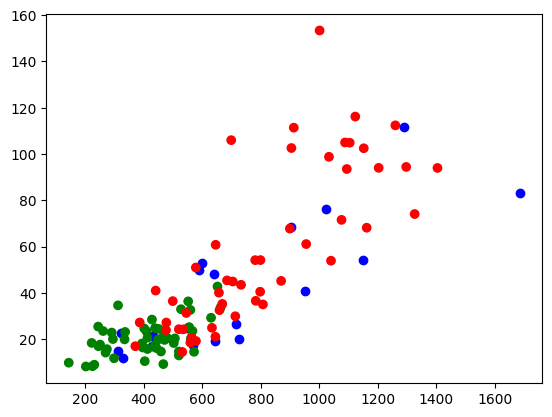

In [10]:
def Plot(trainedList, testList):
    trainedLabels=[]
    for i in range(len(trainedList)):
        if(trainedList[i][-1]=='B'):
            trainedLabels.append('Green')
        else:
            trainedLabels.append('Red')
    plt.scatter([x[0] for x in testList], [x[1] for x in testList], c='Blue')
    plt.scatter([x[0] for x in trainedList], [x[1] for x in trainedList], c=trainedLabels)

plt.show()
Plot(trained, test)